# Estudio de la mejor red

## Preparación del entorno

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras as ker

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

## Lectura dataset

In [2]:
iris_RAW = pd.read_csv('../Data/iris.data', sep=',')

iris_entrenamiento, iris_test = train_test_split(iris_RAW, test_size = 0.20, shuffle=True) # El entreno es el 80% y el conjunto prueba 20%

# Generamos las salidas de las diferentes listas
esperadas_entrenamiento = iris_entrenamiento.pop("class")
esperadas_test = iris_test.pop("class")


## Creación entradas y salidas

In [3]:
# Normalización entradas en base a máximo y mínimo (máximo es 1 - mínimo es 0)

irisE = (iris_entrenamiento - iris_entrenamiento.min()) / (iris_entrenamiento.max() - iris_entrenamiento.min())
irisT = (iris_test - iris_test.min()) / (iris_test.max() - iris_test.min())

entradasE =  irisE.to_numpy() # Las 30 posibles variables
esperadasE = esperadas_entrenamiento.to_numpy() # Array de B/M con el diagnóstico

entradasT = irisT.to_numpy() 
esperadasT = esperadas_test.to_numpy()

# Categorizamos el diagnostico de entreno 
label_encoder = LabelEncoder()
esperadasE = label_encoder.fit_transform(esperadasE)

# Categorizamos el diagnostico de predicción 
esperadasT = label_encoder.fit_transform(esperadasT)


## Variables a tocar

In [4]:
nNeuronasCapaOculta = 7 # Tocar
Epoch = 500 # Tocar
tam_entrada = irisE.shape[1] # Tamaño de la capa de entrada = columnas

automatizador = True # Ejecutar el automatizador para encontrar los parametros que mas se ajustan a los datos

## Creación y ajuste de la red

In [5]:
def initRed(nNeuronasCapaOculta, tam_entrada):
    MLP = ker.Sequential() # Creamos el modelo vacío

    # Añadimos la primera capa (tecnicamente dos, la de entrada (con la variable input_dim) y la oculta)
    MLP.add(ker.layers.Dense(nNeuronasCapaOculta, input_dim = tam_entrada, activation='relu'))

    # Añadimos la capa de salida
    MLP.add(ker.layers.Dense(1,activation='sigmoid')) 

    # MLP.summary()

    # Por último tenemos que configurar el modelo antes de entrenarlo con lo dicho en el enunciado
    # Optimizador: Adam
    # Función error: Mean Squared Error
    # Metricas = Binary accuracy porque nos da el número de precisión de la red
    MLP.compile(optimizer='adam',loss='mean_squared_error',metrics=["binary_accuracy"])
    return MLP

## Entrenamiento de la red 

In [6]:
def entrenar(MLP,Epoch,entradas,esperadas):#,entradasVal,esperadasVal):
    # Por último entrenamos la red con el epoch (nº iteraciones)
    output_fit = MLP.fit(entradas,esperadas,validation_split=0.20,epochs=Epoch,verbose = 0) #validation_data=() % 20% de los datos se usan para validar
    return output_fit

## Calidad de la red

In [7]:
def pintarExact(output_fit):
    print(output_fit.history.keys())
    # Pintamos las tanto la loss como la accuracy
    plt.plot(output_fit.history['loss'])
    plt.plot(output_fit.history['binary_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Error', 'Exactitud'], loc='lower left')
    plt.show()

## Evaluación de la red

In [8]:
def evaluar(MLP,entradas,esperadas):
    # Evaluamos el modelo
    print("Datos evaluados")
    evaluar = MLP.evaluate(entradas, esperadas,verbose=0)
    print("Error, Exactitud:", evaluar)
    return evaluar

def evaluarAuto(MLP,entradas,esperadas):
    return MLP.evaluate(entradas, esperadas,verbose=0)

## Prueba de nuestra mejor red

In [9]:
if not automatizador:
    MLP = initRed(nNeuronasCapaOculta, tam_entrada)
    output_fit = entrenar(MLP,Epoch,entradasE,esperadasE)#,entradasV,esperadasV) # conjunto de entrenamiento junto con el conjunto de validación
    pintarExact(output_fit)
    evaluacion = evaluar(MLP,entradasT,esperadasT)  # conjunto de prueba

# Estudio del Nº Neuronas óptimo

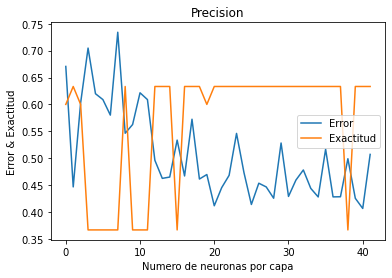

Iter , loss, accuracy
0 0.6705794930458069 0.6000000238418579
1 0.44663387537002563 0.6333333253860474
2 0.6029209494590759 0.6000000238418579
3 0.7047273516654968 0.36666667461395264
4 0.6198748350143433 0.36666667461395264
5 0.6089473009109497 0.36666667461395264
6 0.5801202654838562 0.36666667461395264
7 0.734178900718689 0.36666667461395264
8 0.5464016199111938 0.6333333253860474
9 0.5625879764556885 0.36666667461395264
10 0.6216086149215698 0.36666667461395264
11 0.608961925723336 0.36666667461395264
12 0.49609482288360596 0.6333333253860474
13 0.46250292658805847 0.6333333253860474
14 0.4649483859539032 0.6333333253860474
15 0.5336624383926392 0.36666667461395264
16 0.46695610880851746 0.6333333253860474
17 0.5724533994886327 0.6333333253860474
18 0.46125543117523193 0.6333333253860474
19 0.46962860226631165 0.6000000238418579
20 0.4115608334541321 0.6333333253860474
21 0.4452510178089142 0.6333333253860474
22 0.46811190247535706 0.6333333253860474
23 0.5460856077380581 0.6333333

In [17]:
# neuronas
errorF = []
accuracyF = []
if automatizador:
    neuronas = [i for i in range(5,40,5)]
    precision = 5
    # Una vez hemos inicializado, podemos empezar a iterar con las listas creadas para encontrar la mejor configuración para los datos 
    err = []
    ex = []
    outputErr = [err,ex]
    for neurona in neuronas:
        print("Numero de neuronas:",neurona,end="\r")
        for i in range(precision):
            MLP = initRed(neurona, tam_entrada)
            output_fit = entrenar(MLP,100,entradasE,esperadasE)
            error,exact = evaluarAuto(MLP,entradasT,esperadasT)
            err.append(error)
            ex.append(exact)
        outputErr[0].append(np.mean(err))
        outputErr[1].append(np.mean(exact))
    errorF = outputErr[0].copy()
    accuracyF = outputErr[1].copy()
    # Ahora pintamos la grafica para ver el error y la precisión
    plt.title('Precision')
    plt.plot(outputErr[0])
    plt.plot(outputErr[1])
    plt.legend(['Error', 'Exactitud'], loc='center right')
    plt.ylabel('Error & Exactitud')
    plt.xlabel('Numero de neuronas por capa')
    plt.show()
    print("Iter , loss, accuracy")
    for i in range(len(errorF)):
        print(i, errorF[i],accuracyF[i])

#### Yo creo que 7 es el numero clave mirar las fotos a ver que sacais vosotros

# Bibliografía

- LAB02 de nuestro grupo 